<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/PCA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [475]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision
from sklearn.datasets import load_digits

In [476]:
data = torch.from_numpy(load_digits().data)
target = torch.from_numpy(load_digits().target)

In [477]:
mean_of_data = data - torch.mean(data, axis=0)

In [478]:
covariance = torch.matmul(mean_of_data.T, mean_of_data)
covariance.shape

torch.Size([64, 64])

In [479]:
eigenvalues, eigenvectors = torch.linalg.eigh(covariance)


In [480]:
sort_eigenvalues = eigenvalues.sort(descending=True).indices
pca = eigenvectors[sort_eigenvalues][0:2]
pca.shape

torch.Size([2, 64])

In [481]:
projected_data = torch.matmul(pca, mean_of_data.T).T
projected_data.shape

torch.Size([1797, 2])

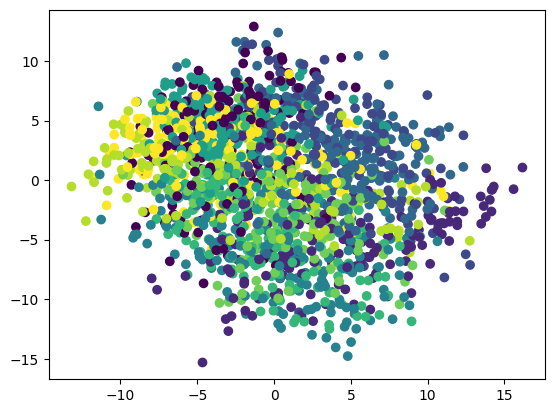

In [482]:
plt.scatter(projected_data[:,0], projected_data[:,1], c=target)

In [483]:
normal1 = torch.distributions.Normal(loc=torch.tensor([0., 0.]), scale=torch.tensor([20., 0.5]))
#normal1 = torch.distributions.MultivariateNormal(loc=torch.tensor([[0.], [0.]]), scale_tril=torch.tensor([[1.],[0.5]]),)
#normal2 = torch.distributions.Normal(loc=torch.tensor([3., 3.]), scale=torch.tensor([0.5, 0.5]))

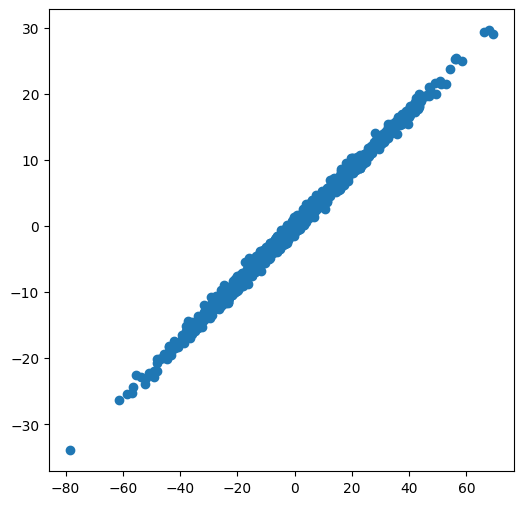

In [484]:
data1 = normal1.sample([1000])
# rotation matrisi ile çarptım theta = 30 derece
data1 = torch.matmul(torch.tensor([[2/torch.sqrt(torch.tensor([3.])), -1/2], [1/2, 2/torch.sqrt(torch.tensor([3.]))]]), data1.T).T
#data2 = normal2.sample([100])

plt.figure(figsize=(6,6))
plt.scatter(data1[:,0], data1[:,1])
#plt.scatter(data2[:,0], data2[:,1])

In [485]:
#data = torch.concat([data1, data2], axis=0)
data = data1

In [486]:
data_mean = (data - data.mean(axis=0))

In [487]:
cov = torch.cov(data_mean.T)
print(cov.shape)

torch.Size([2, 2])


In [488]:
cov

tensor([[497.0815, 215.1203],
        [215.1204,  93.5427]])

In [489]:
eigenvalues, eigenvectors = torch.linalg.eigh(cov)
print(eigenvalues, eigenvectors)

tensor([3.7537e-01, 5.9025e+02]) tensor([[ 0.3974, -0.9176],
        [-0.9176, -0.3974]])


In [490]:
sort_eigenvalues = eigenvalues.sort(descending=True).indices
pca = eigenvectors[sort_eigenvalues][0]
pca

tensor([-0.9176, -0.3974])

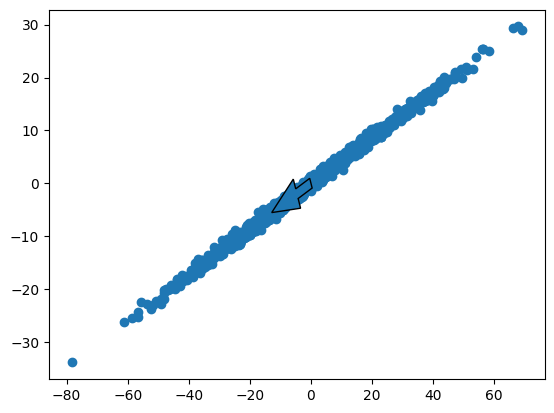

In [491]:
plt.scatter(data1[:,0], data1[:,1])
#plt.scatter(data2[:,0], data2[:,1])
plt.arrow(0, 0, pca[0]*5, pca[1]*5 , width = 2)